In [1]:
import numpy as np
from scipy import stats

## task01

Известно, что генеральная совокупность распределена нормально с известным средним квадратическим отклонением 16. Найти доверительный интервал для оценки математического ожидания mu с надёжностью 0.95, если выборочное среднее равно 80, а объём равен 256.

In [2]:
n = 256
mean = 80
std = 16


In [3]:
p = 0.95
alpha = 1 - p

In [4]:
t1 = stats.norm.ppf(alpha / 2)
t2 = stats.norm.ppf(1 - alpha / 2)
t1, t2

(-1.959963984540054, 1.959963984540054)

In [5]:
(mean + t1 * std / np.sqrt(n), mean + t2 * std / np.sqrt(n))

(78.04003601545995, 81.95996398454005)

In [6]:
# ?stats.norm

## task02

Продавец утверждает, что средний вес пачки печенья составляет 200 г. Из партии извлечена выборка из 10 пачек. Вес каждой пачки составляет:

202, 203, 199, 197, 195, 201, 200, 204, 194, 190
Известно, что их веса распределены нормально.

Верно ли утверждение продавца, если учитывать, что уровень значимости равен 1%?
Найдите P-значение для данного теста.

In [7]:
samples = np.array([202, 203, 199, 197, 195, 201, 200, 204, 194, 190])

In [8]:
np.mean(samples), np.std(samples, ddof = 1)

(198.5, 4.453463071962462)

In [9]:
alpha = 0.01

In [10]:
def t_statistic(samples: np.ndarray) -> float:
    return (samples.mean() - 200) / (samples.std(ddof = 1) / np.sqrt(len(samples)))

In [11]:
n = len(samples)
t1 = stats.t.ppf(alpha / 2, df = n - 1)
t2 = stats.t.ppf(1 - alpha / 2, df = n - 1)

t1, t2

(-3.24983554401537, 3.2498355440153697)

In [12]:
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')

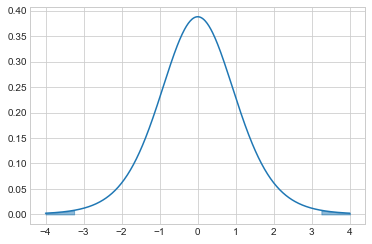

In [13]:
ox = np.linspace(-4, 4, 500)
oy = stats.t.pdf(ox, df=n - 1)

ox_left = np.linspace(-4, t1, 100)
oy_left = stats.t.pdf(ox_left, df=n - 1)

ox_right = np.linspace(t2, 4, 100)
oy_right = stats.t.pdf(ox_right, df=n - 1)

plt.plot(ox, oy)
plt.fill_between(ox_left, oy_left, alpha=0.5, color='C0')
plt.fill_between(ox_right, oy_right, alpha=0.5, color='C0')

In [14]:
t = t_statistic(samples)
t

-1.0651074037450896

In [15]:
t1 < t < t2

True

Значение статистики не попало в критическую область, значит, гипотеза остаётся в силе.

In [16]:
p_left = stats.t.cdf(t, df=n - 1)
p_right = 1 - stats.t.cdf(t, df=n - 1)

pvalue = 2 * min(p_left, p_right)

pvalue

0.31456660352472854

In [17]:
# print('alpha\tresult')
# print('-------------')

# for alpha in np.linspace(0, 0.35, 15):
#     t1 = stats.t.ppf(alpha / 2, df=n - 1)
#     t2 = stats.t.ppf(1 - alpha / 2, df=n - 1)
    
#     print(round(alpha, 4), '\t', t1 <= S <= t2)

## task 03

Дана выборка диаметров подшипников из примера 1 с занятия 5:

samples = [0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
           1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
           0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02  ]
Предполагая, что диаметры подшипников распределены нормально, проверьте гипотезу о том, что дисперсия случайной величины равна 0.0625 при уровне значимости alpha = 0.05. Что для этого нужно знать:

Альтернативная гипотеза двухсторонняя.
Статистика для теста: H = (n - 1) * sample_variance / variance, где n - число элементов в выборке, sample_variance - несмещённая оценка дисперсии, variance - утверждаемая нулевой гипотезой дисперсия.
Эта статистика в предположении верности нулевой гипотезы имеет распределение хи-квадрат с параметром df = n - 1. Её квантили можно найти с помощью функции scipy.stats.chi2.ppf.

In [18]:
samples = np.array([0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134, 1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372, 0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02])

In [19]:
np.mean(samples), np.var(samples, ddof = 1)

(1.1084541666666665, 0.07804495041666669)

In [20]:
alpha = 0.05
n = len(samples)
variance = 0.0625

In [21]:
def h_statistic(samples: np.ndarray) -> float:
    return (n - 1) * np.var(samples, ddof = 1) / variance

In [22]:
t1 = stats.chi2.ppf(alpha / 2, df = n - 1)
t2 = stats.chi2.ppf(1 - alpha / 2, df = n - 1)

t1, t2

(11.688551922452438, 38.0756272503558)

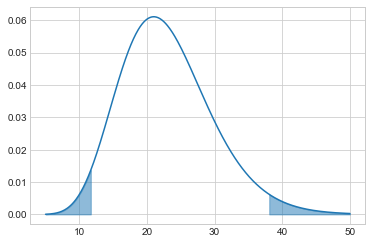

In [23]:
ox = np.linspace(5, 50, 500)
oy = stats.chi2.pdf(ox, df=n - 1)

ox_left = np.linspace(5, t1, 100)
oy_left = stats.chi2.pdf(ox_left, df=n - 1)

ox_right = np.linspace(t2, 50, 100)
oy_right = stats.chi2.pdf(ox_right, df=n - 1)

plt.plot(ox, oy)
plt.fill_between(ox_left, oy_left, alpha=0.5, color='C0')
plt.fill_between(ox_right, oy_right, alpha=0.5, color='C0')

In [24]:
h = h_statistic(samples)
h

28.720541753333343

In [25]:
t1 < h < t2

True